In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# fname = '2d-team-7-train.txt'
def datasize(f):
    df = pd.read_csv('2d_team_7_train.txt', header=None, delimiter = ' ')
    sample = df.sample(frac=f,random_state=25)
    array = sample.to_numpy(); xone = array[:, 0]; xtwo = array[:, 1]; t = array[:,2]
    
    dfx = pd.read_csv('2d_team_7_dev.txt', header=None, delimiter = ' ')
    samplex = dfx.sample(frac=f,random_state=25)
    arrayx = samplex.to_numpy(); xdev = arrayx[:, 0]; ydev = arrayx[:, 1]; tdev = array[:,2]
    return (xone, xtwo, t, xdev, ydev, tdev)

In [3]:
# xone,xtwo,t = np.loadtxt(fname, skiprows=1, unpack=True)
xone, xtwo, t, xdev, ydev, tdev = datasize(1)
# ax = plt.axes(projection ='3d')
# ax.scatter3D(xone,xtwo,t)
# plt.show()

# fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
 
# # Creating plot
# ax.plot_surface(xone, xtwo, t)
 
# # show plot
# plt.show()

In [4]:
def makephi(n,m):
    phi = np.ones(xone.shape[0])
    done = np.arange(1,n,1)
    dtwo = np.arange(1,m,1)
    
    for i in done:
        phi = np.column_stack((phi,xone**i))
                 
    for j in dtwo:
        phi = np.column_stack((phi,xtwo**j))
        
    
        
    return phi
# phi = np.column_stack((phi,xone))
# phi = np.column_stack((phi,xtwo))
# phi = np.column_stack((phi,xtwo**2))
# phi = np.column_stack((phi,xone**2))

phi = makephi(20,20)
phi.shape




(1000, 39)

In [5]:
rang = np.arange(2,10,1)
summ = 100
ind = [1,1]
for i in rang:
    for j in rang:
        phi = makephi(i,j)
        r = phi.T@phi
        l = np.linalg.inv(r)
        fin = l@phi.T@t
        final = phi@fin
        deter = (t-final)**2
        sume = 0
        for k in deter:
            sume = sume + k
        sume
        if sume<summ:
            summ = sume
            ind = [i,j]  
ind




[9, 9]

In [6]:
phi = makephi(2,2)
r = phi.T@phi + np.identity(3)
l = np.linalg.inv(r)
fin = l@phi.T@t
final = phi@fin
phi.shape

(1000, 3)

No handles with labels found to put in legend.


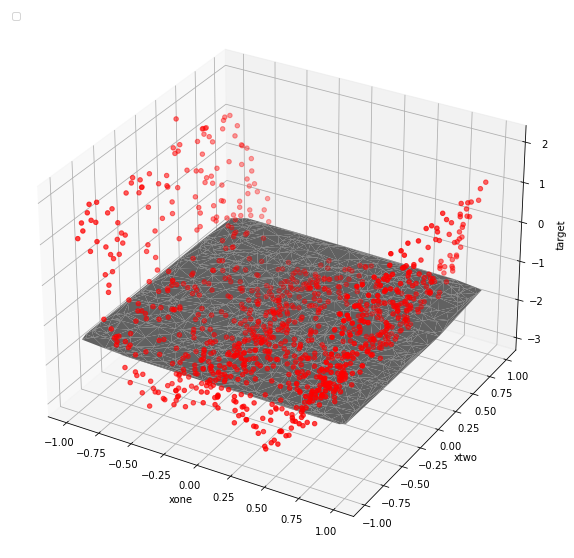

In [7]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xone,xtwo,t,color='red')
 
# Creating plot
surf = ax.plot_trisurf(xone, xtwo, final,color='gray')
# ax.legend(["Model Curve","Training Set"])
# ax.view_init(10, 90)
# show plot
ax.set_xlabel('xone')
ax.set_ylabel('xtwo')
ax.set_zlabel('target')
ax.legend(loc='upper left')
plt.show()